## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [21]:
! git clone https://github.com/DS3001/labs/

Cloning into 'labs'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 97 (delta 37), reused 41 (delta 23), pack-reused 31 (from 1)
Receiving objects: 100% (97/97), 22.16 MiB | 24.96 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [12]:
import pandas as pd

df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
print(df.info(), "\n")
tokens = df['Email Text'].str.split()
print(tokens)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18634 entries, 0 to 18633
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       18634 non-null  int64 
 1   Unnamed: 0  18634 non-null  int64 
 2   Email Text  18634 non-null  object
 3   Email Type  18634 non-null  object
dtypes: int64(2), object(2)
memory usage: 582.4+ KB
None 

0        [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1        [the, other, side, of, *, galicismos, *, *, ga...
2        [re, :, equistar, deal, tickets, are, you, sti...
3        [Hello, I, am, your, hot, lil, horny, toy., I,...
4        [software, at, incredibly, low, prices, (, 86,...
                               ...                        
18629    [date, a, lonely, housewife, always, wanted, t...
18630    [request, submitted, :, access, request, for, ...
18631    [re, :, important, -, prc, mtg, hi, dorn, &, j...
18632    [press, clippings, -, letter, on, californian,...
186

# **Complete writing after assignment!**

### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [36]:
import pickle
import matplotlib.pyplot as plt

with open('/content/labs/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

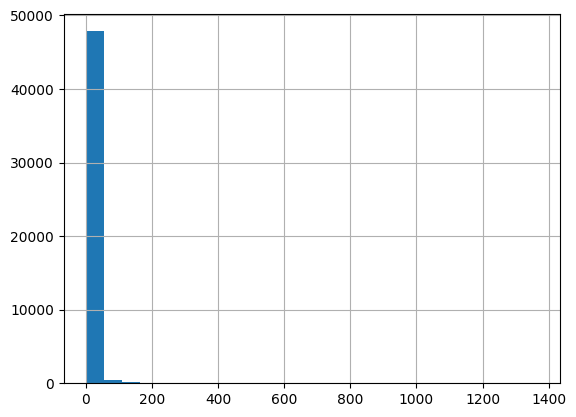

Max Count: 1365 

count
1      29404
2       7216
3       2934
4       1755
5       1141
       ...  
245        1
237        1
236        1
233        1
159        1
Name: count, Length: 314, dtype: int64


In [37]:
hist = pd.DataFrame(token_freq, columns=['token', 'count'])
hist['count'].hist(bins=25)
plt.show()

print("Max Count:", hist['count'].max(), "\n")
print(hist['count'].value_counts())

There are 29,404 cases of a token appearing only once and the highest count of an individual token is 1,365. As the count of a token increases, the frequency of this occurring decreases. We can also see from the graph that the histogram is extremly skewed right.

### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_parquet('/content/labs/05_PCA/Phishing_clean.parquet')

y = df['Email Type']
X = df.drop('Email Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

lm_0 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_hat_test_0 = lm_0.predict(X_test)
y_hat_train_0 = lm_0.predict(X_train)
print('Train: ', r2_score(y_hat_train_0, y_train))
print('Test: ', r2_score(y_hat_test_0, y_test))

rdf = pd.DataFrame({'variable':lm_0.feature_names_in_, 'value':lm_0.coef_, 'abs':np.abs(lm_0.coef_)})
rdf.sort_values('abs', ascending=False)

Train:  0.6161679353426366
Test:  -0.0009656668898729848


,variable,value,abs
2054,"20,",-9.236380e+12,9.236380e+12
1998,7.3,-8.438607e+12,8.438607e+12
2177,â€¢â,-7.552904e+12,7.552904e+12
1584,demokritos,7.071592e+12,7.071592e+12
1641,iit,-7.071592e+12,7.071592e+12
...,...,...,...
2309,detail,1.678467e-04,1.678467e-04
2105,taylor,-1.621246e-04,1.621246e-04
2002,concern,7.629395e-06,7.629395e-06
2642,301,3.528687e-06,3.528687e-06


The tokens with the largest coefficients in absolute value, thus, most strongly influencing predictions are: 20, 7.3, â€¢â, demokritos, and iit. There doesn't really seem to be a pattern other than it being uncommonly used in a person's day to day life.

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.